In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.layers import Embedding
from keras.preprocessing import sequence

In [2]:
from keras.datasets import imdb

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [3]:
print(X_train.shape)

(25000,)


In [4]:
max_kelime= 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print ("Egitim kümesinin son hali: \n", X_train)

Egitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [5]:
# Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid") )
model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

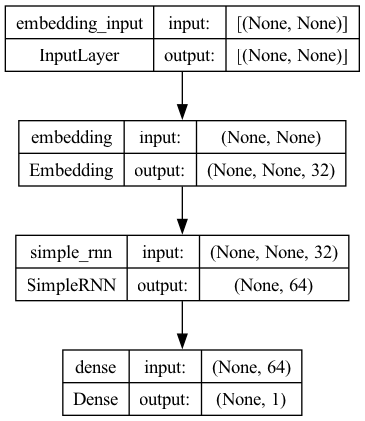

In [6]:
# Model grafiginin çizdirilmesi
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli.png",
                          show_shapes=True, show_layer_names=True)

In [7]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/10
40/40 [==============================] - 9s 216ms/step - loss: 0.6934 - accuracy: 0.5234 - val_loss: 0.6855 - val_accuracy: 0.5768
Epoch 2/10
25/40 [=================>............] - ETA: 3s - loss: 0.6734 - accuracy: 0.6072

KeyboardInterrupt: 

In [ ]:
#https://youtu.be/kZkShuIKSK8?si=WTajg9f038yqz1NP

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

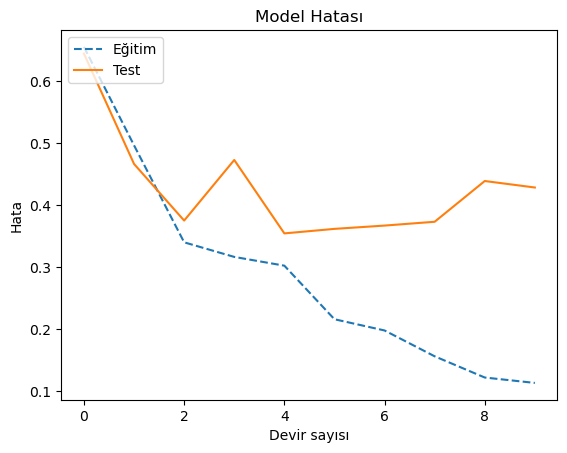

In [28]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

In [31]:
performans = model.evaluate(X_test, y_test, verbose=0)
print("Modelin doğruluğu: %.2f%%" % (performans[1] * 100))

Modelin doğruluğu: 84.73%
